In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
em = sc.read('K135_lusc_Mye.h5ad')
em

AnnData object with n_obs × n_vars = 27009 × 2000
    obs: 'Tissue', 'Disease', 'Stage', 'CellName', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'source', 'sample', 'patient', 'cell type', 'stage_group', 'stage_sample', 'leiden_1', 'leiden_0.8', 'leiden_0.6', 'subtype'
    var: 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell type_colors', 'dendrogram_leiden_0.6', 'dendrogram_leiden_0.8', 'dendrogram_leiden_1', 'hvg', 'leiden', 'leiden_0.6_colors', 'leiden_0.8_colors', 'leiden_1_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'source_colors', 'subtype_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
em = em.raw.to_adata()
em.raw = em
em

AnnData object with n_obs × n_vars = 27009 × 17039
    obs: 'Tissue', 'Disease', 'Stage', 'CellName', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'source', 'sample', 'patient', 'cell type', 'stage_group', 'stage_sample', 'leiden_1', 'leiden_0.8', 'leiden_0.6', 'subtype'
    var: 'mt'
    uns: 'cell type_colors', 'dendrogram_leiden_0.6', 'dendrogram_leiden_0.8', 'dendrogram_leiden_1', 'hvg', 'leiden', 'leiden_0.6_colors', 'leiden_0.8_colors', 'leiden_1_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'source_colors', 'subtype_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    obsp: 'connectivities', 'distances'

In [4]:
em.obs.drop(['leiden_0.8','leiden_1'], axis=1, inplace=True)
em.obs

Tissue Disease    Stage CellName  \
2018jz11_AAACGGGTCCGTCATC-1    Tumor    LUSC        I       Mo   
2018jz11_AAACGGGTCCTCATTA-1    Tumor    LUSC        I       Mo   
2018jz11_AAACGGGTCGGCTACG-1    Tumor    LUSC        I       DC   
2018jz11_AAAGATGAGGCGACAT-1    Tumor    LUSC        I       Mo   
2018jz11_AAAGATGCATGTAAGA-1    Tumor    LUSC        I       DC   
...                              ...     ...      ...      ...   
P41_ACTATTCGAGAC-59          unknown    LUSC  unknown  unknown   
P41_CAAACGTGCCAA-59          unknown    LUSC  unknown  unknown   
P41_ACGACCGCCCAT-59          unknown    LUSC  unknown  unknown   
P41_AGTCTGGATCGC-59          unknown    LUSC  unknown  unknown   
P41_CTGACGGTGAAA-59          unknown    LUSC  unknown  unknown   

                             n_genes_by_counts  total_counts  total_counts_mt  \
2018jz11_AAACGGGTCCGTCATC-1               3322       17459.0           1147.0   
2018jz11_AAACGGGTCCTCATTA-1               2620       10550.0            510.0   
2018jz11_AAACGGGTCGGCTACG-1               2584       10034.0            318.0   
2018jz11_AAAGATGAGGCGACAT-1               2450       10545.0            577.0   
2018jz11_AAAGATGCATGTAAGA-1               3073       13454.0            315.0   
...                                        ...           ...              ...   
P41_ACTATTCGAGAC-59                        586        1095.0             61.0   
P41_CAAACGTGCCAA-59                        569        1046.0            136.0   
P41_ACGACCGCCCAT-59                        599         998.0             58.0   
P41_AGTCTGGATCGC-59                        473         981.0            163.0   
P41_CTGACGGTGAAA-59                        503         959.0             46.0   

                             pct_counts_mt   source    sample patient  \
2018jz11_AAACGGGTCCGTCATC-1       6.569678   wchscu  2018jz11    PS02   
2018jz11_AAACGGGTCCTCATTA-1       4.834123   wchscu  2018jz11    PS02   
2018jz11_AAACGGGTCGGCTACG-1       3.169225   wchscu  2018jz11    PS02   
2018jz11_AAAGATGAGGCGACAT-1       5.471788   wchscu  2018jz11    PS02   
2018jz11_AAAGATGCATGTAAGA-1       2.341311   wchscu  2018jz11    PS02   
...                                    ...      ...       ...     ...   
P41_ACTATTCGAGAC-59               5.570776  shsfkyy       P41     P41   
P41_CAAACGTGCCAA-59              13.001911  shsfkyy       P41     P41   
P41_ACGACCGCCCAT-59               5.811623  shsfkyy       P41     P41   
P41_AGTCTGGATCGC-59              16.615698  shsfkyy       P41     P41   
P41_CTGACGGTGAAA-59               4.796663  shsfkyy       P41     P41   

                                 cell type stage_group stage_sample  \
2018jz11_AAACGGGTCCGTCATC-1  Myeloid cells           I   I_2018jz11   
2018jz11_AAACGGGTCCTCATTA-1  Myeloid cells           I   I_2018jz11   
2018jz11_AAACGGGTCGGCTACG-1  Myeloid cells           I   I_2018jz11   
2018jz11_AAAGATGAGGCGACAT-1  Myeloid cells           I   I_2018jz11   
2018jz11_AAAGATGCATGTAAGA-1  Myeloid cells           I   I_2018jz11   
...                                    ...         ...          ...   
P41_ACTATTCGAGAC-59          Myeloid cells      III&IV   III&IV_P41   
P41_CAAACGTGCCAA-59          Myeloid cells      III&IV   III&IV_P41   
P41_ACGACCGCCCAT-59          Myeloid cells      III&IV   III&IV_P41   
P41_AGTCTGGATCGC-59          Myeloid cells      III&IV   III&IV_P41   
P41_CTGACGGTGAAA-59          Myeloid cells      III&IV   III&IV_P41   

                            leiden_0.6      subtype  
2018jz11_AAACGGGTCCGTCATC-1          2  Macrophages  
2018jz11_AAACGGGTCCTCATTA-1          5    Monocytes  
2018jz11_AAACGGGTCGGCTACG-1          4         cDC2  
2018jz11_AAAGATGAGGCGACAT-1          2  Macrophages  
2018jz11_AAAGATGCATGTAAGA-1          4         cDC2  
...                                ...          ...  
P41_ACTATTCGAGAC-59                  5    Monocytes  
P41_CAAACGTGCCAA-59                  3    Monocytes  
P41_ACGACCGCCCAT-59                  2  Macropha

# Myeloid cell annotation

In [5]:
# extract top highly variable genes
sc.pp.highly_variable_genes(em, flavor='seurat', n_top_genes=2000, span=0.3, n_bins=20, min_mean=0.0125, max_mean=3, min_disp=0.5)
# actually do the filtering
em = em[:, em.var.highly_variable]
# regress out effects of total counts per cell, percentages of mitochondrial gene counts and heat shock protein (HSP) related gene counts 
sc.pp.regress_out(em, ['total_counts', 'pct_counts_mt'])
# scale data
sc.pp.scale(em, max_value=10)
# run dimensionality reduction
sc.pp.pca(em, svd_solver='arpack', n_comps=50)

In [6]:
# perform Harmony using PCA results to adjust the PCs
sc.external.pp.harmony_integrate(em, 'sample', basis='X_pca', adjusted_basis='X_pca_harmony', max_iter_harmony = 100)

2023-06-29 17:15:18,459 - harmonypy - INFO - Iteration 1 of 100
2023-06-29 17:15:35,353 - harmonypy - INFO - Iteration 2 of 100
2023-06-29 17:15:53,364 - harmonypy - INFO - Iteration 3 of 100
2023-06-29 17:16:11,344 - harmonypy - INFO - Iteration 4 of 100
2023-06-29 17:16:28,554 - harmonypy - INFO - Iteration 5 of 100
2023-06-29 17:16:40,501 - harmonypy - INFO - Iteration 6 of 100
2023-06-29 17:16:52,100 - harmonypy - INFO - Iteration 7 of 100
2023-06-29 17:17:02,342 - harmonypy - INFO - Iteration 8 of 100
2023-06-29 17:17:12,058 - harmonypy - INFO - Iteration 9 of 100
2023-06-29 17:17:21,897 - harmonypy - INFO - Iteration 10 of 100
2023-06-29 17:17:31,140 - harmonypy - INFO - Iteration 11 of 100
2023-06-29 17:17:40,025 - harmonypy - INFO - Converged after 11 iterations


In [7]:
# perform BBKNN using Harmony results
sc.external.pp.bbknn(em, batch_key='sample', use_rep='X_pca_harmony', n_pcs=50)

/data/hour/miniconda3/lib/python3.8/site-packages/numba/core/cpu.py:97: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ContextualVersionConflict((numpy 1.22.4 (/data/hour/miniconda3/lib/python3.8/site-packages), Requirement.parse('numpy<1.22,>=1.18'), {'numba'}))'.
  numba.core.entrypoints.init_all()
2023-06-29 17:17:47.843427: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-29 17:17:47.843502: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


/data/hour/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/hour/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


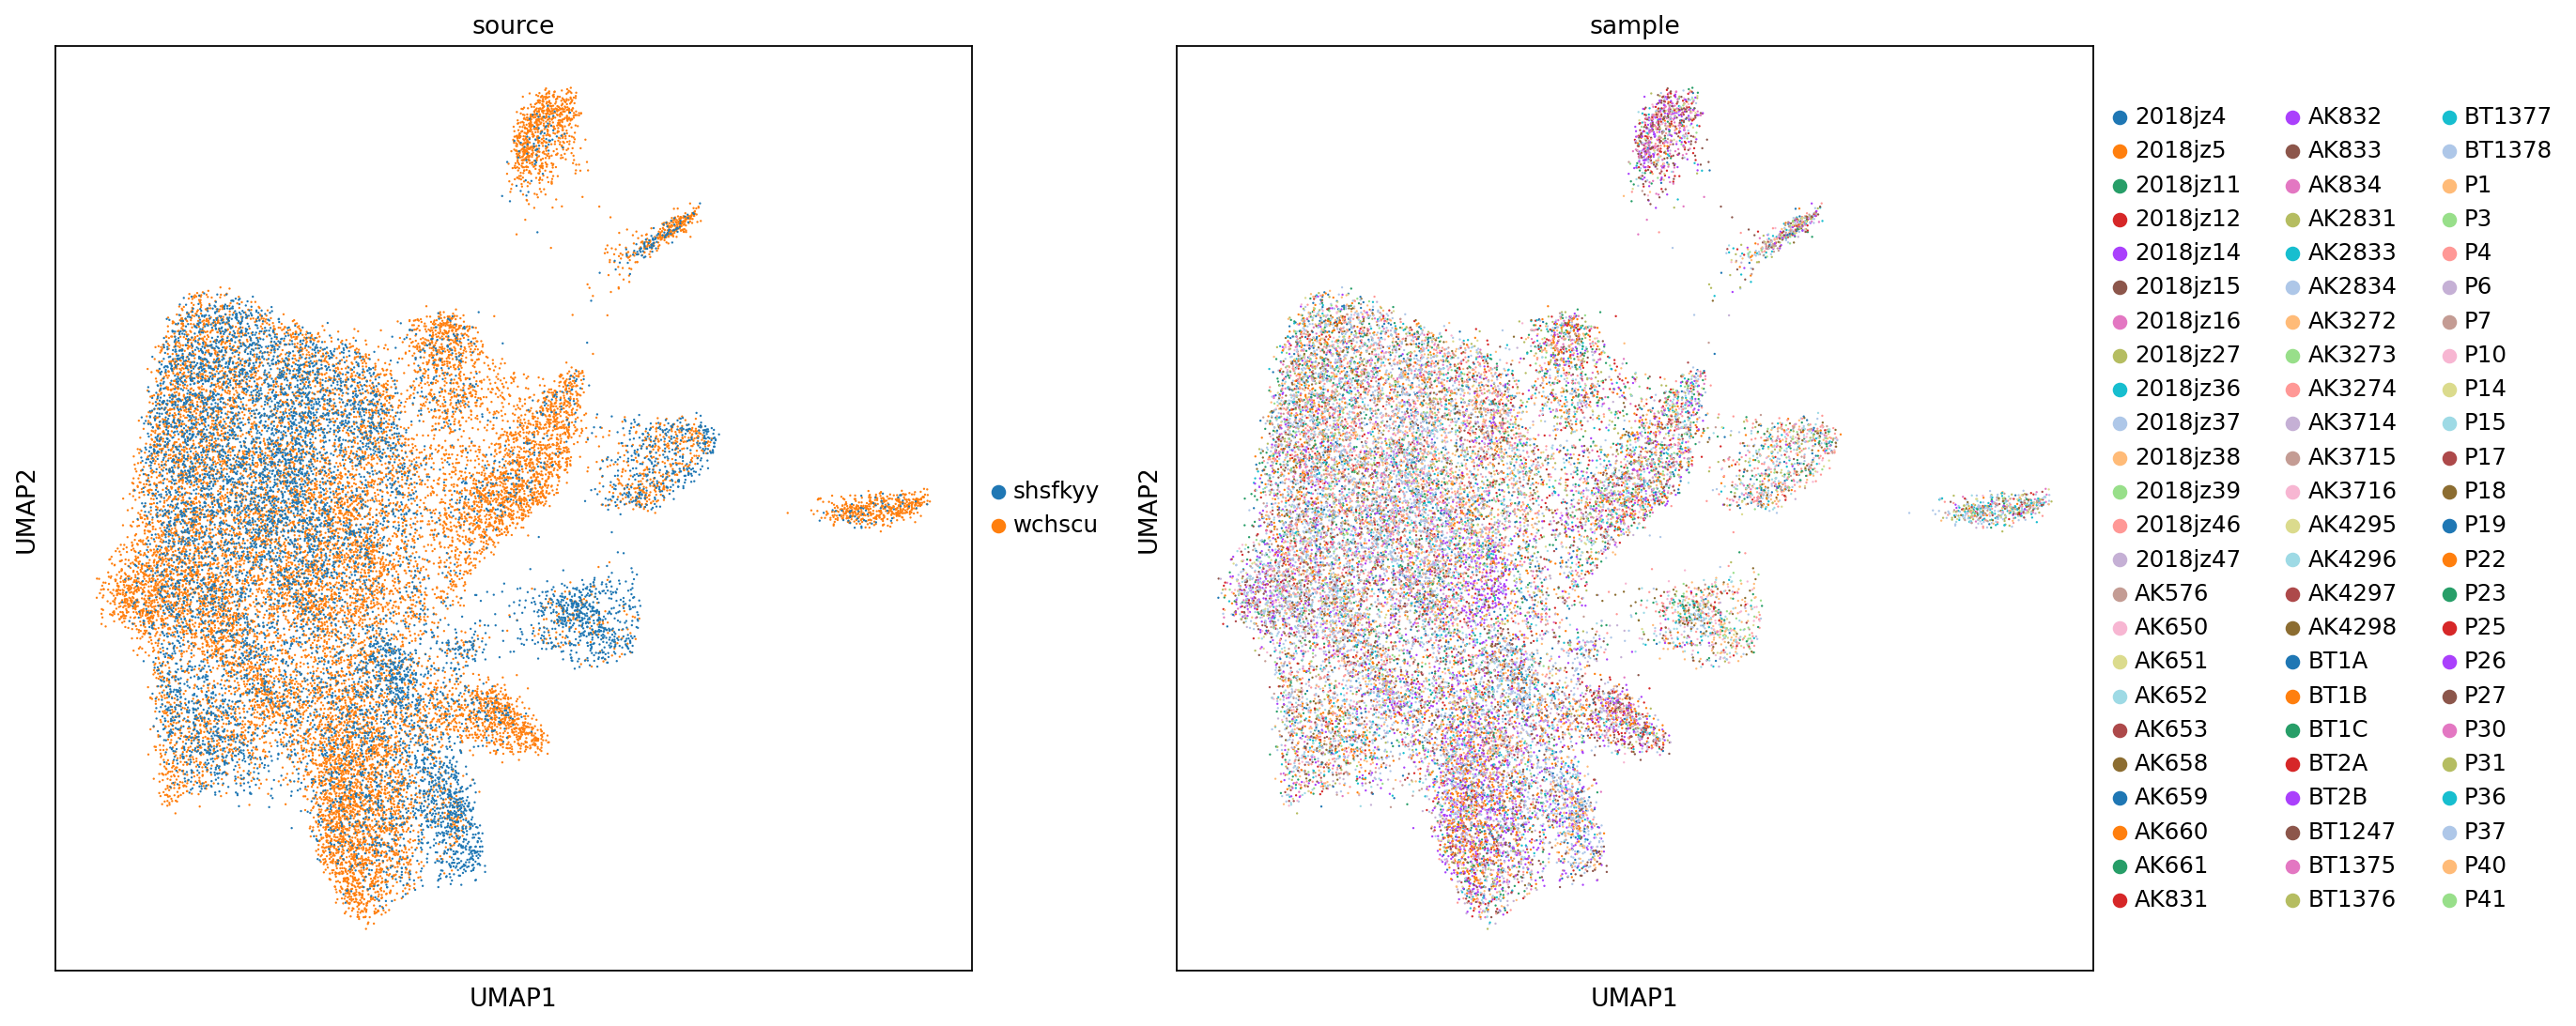

In [8]:
sc.settings.set_figure_params(fontsize=12, figsize=(8,8))
# obtain UMAP plot
sc.tl.umap(em)
sc.pl.umap(em, color=['source','sample'], ncols=2, palette=sc.pl.palettes.vega_20_scanpy)

/data/hour/miniconda3/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/data/hour/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


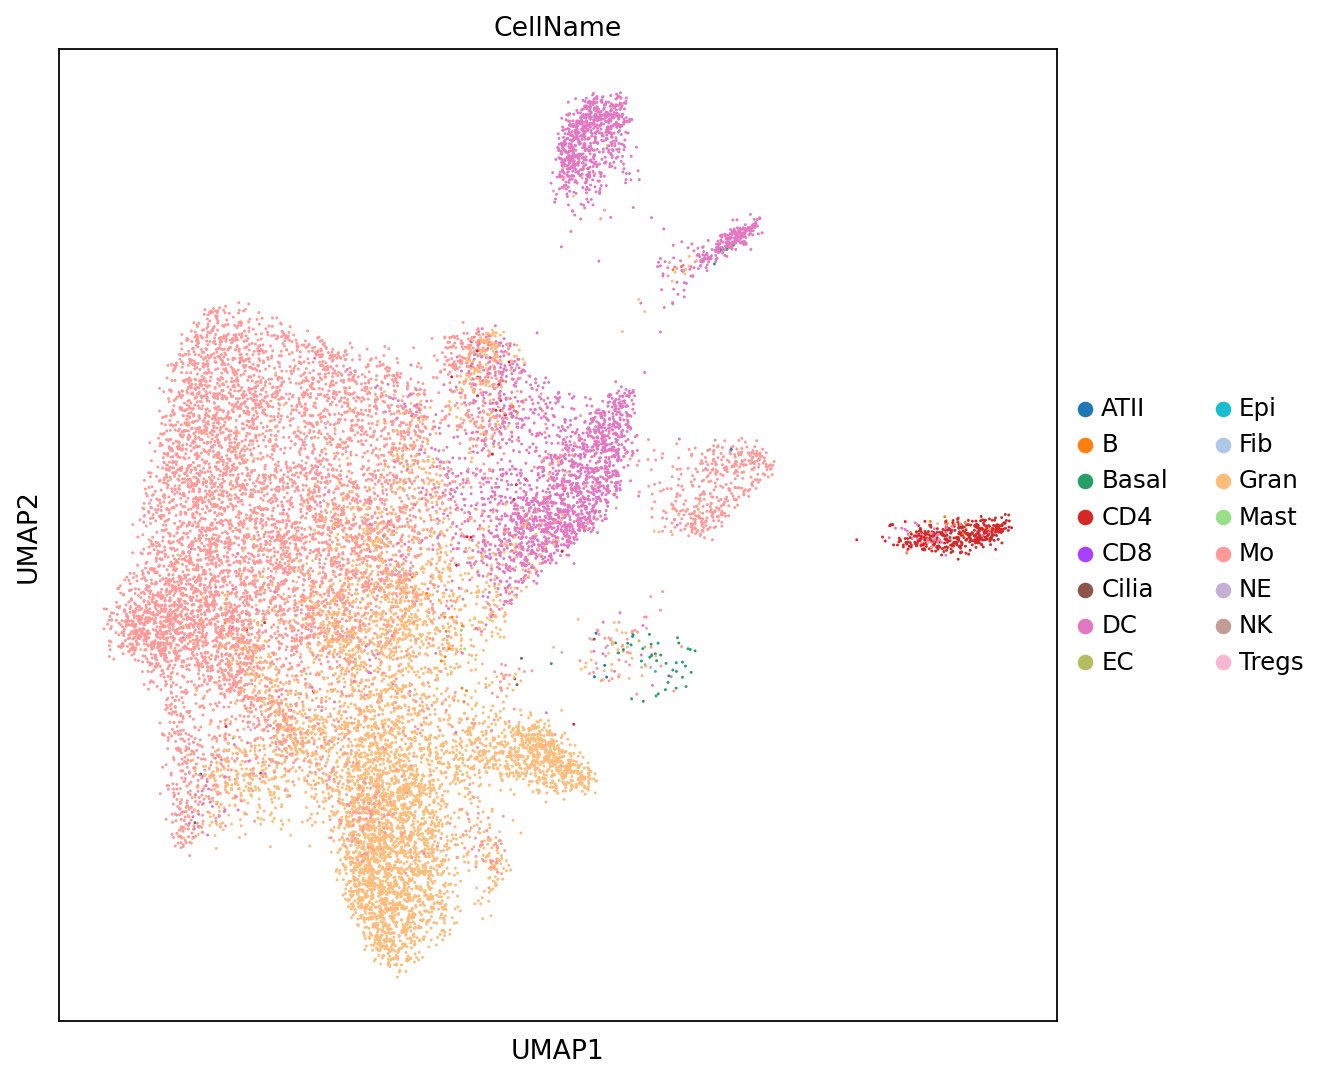

In [9]:
sc.pl.umap(em[em.obs['source']=='wchscu'], color='CellName', ncols=2, palette=sc.pl.palettes.vega_20_scanpy)

/data/hour/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


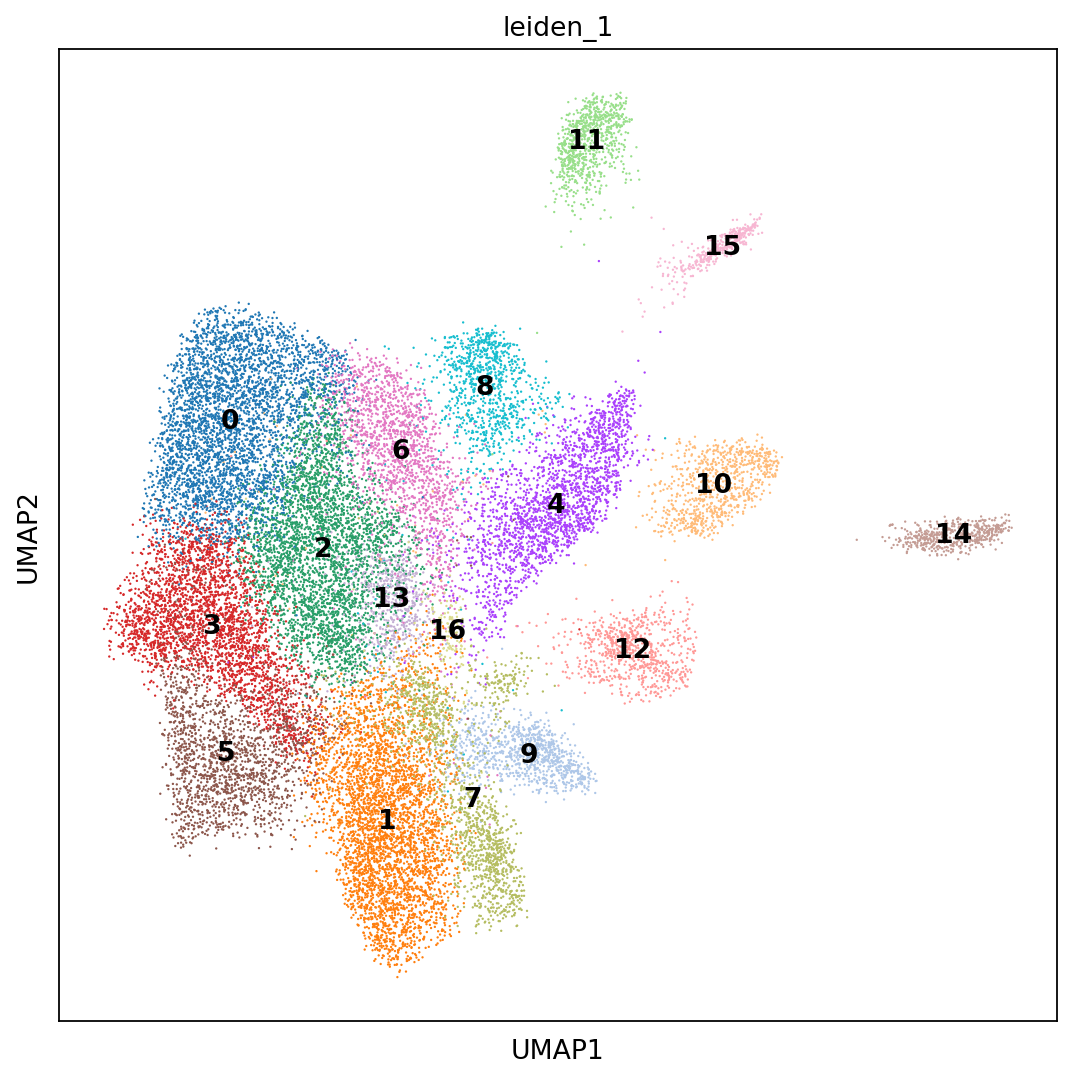

In [10]:
# leiden clustering
sc.tl.leiden(em, resolution=1, random_state=0, key_added='leiden_1')# check the clusters on the UMAP
sc.tl.dendrogram(em,groupby='leiden_1')
sc.pl.umap(em,color=['leiden_1'],legend_loc='on data',palette=sc.pl.palettes.vega_20_scanpy)

/data/hour/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


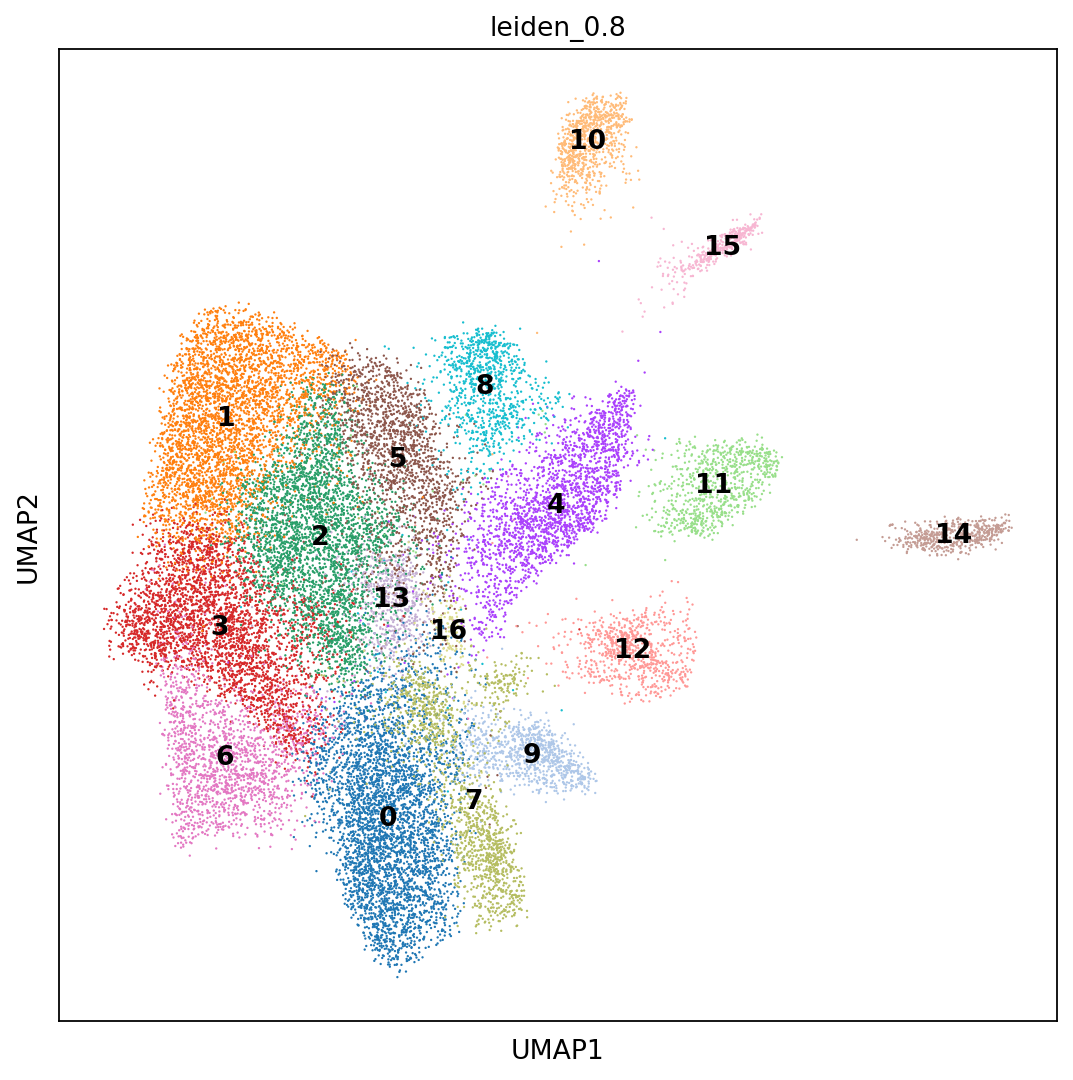

In [11]:
# leiden clustering
sc.tl.leiden(em, resolution=0.8, random_state=0, key_added='leiden_0.8')# check the clusters on the UMAP
sc.tl.dendrogram(em,groupby='leiden_0.8')
sc.pl.umap(em,color=['leiden_0.8'],legend_loc='on data',palette=sc.pl.palettes.vega_20_scanpy)

/data/hour/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


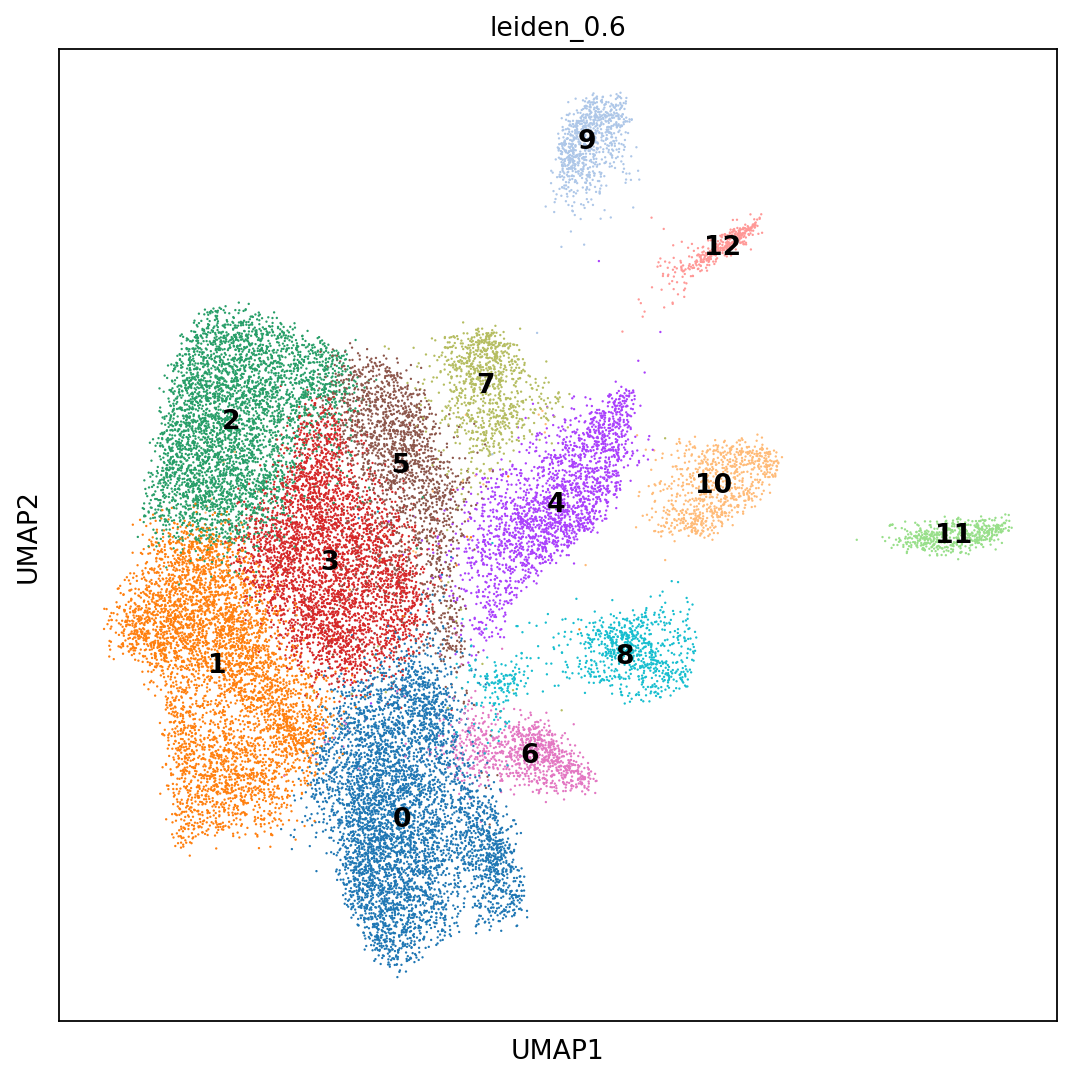

In [12]:
# leiden clustering
sc.tl.leiden(em, resolution=0.6, random_state=0, key_added='leiden_0.6')# check the clusters on the UMAP
sc.pl.umap(em,color=['leiden_0.6'],legend_loc='on data',palette=sc.pl.palettes.vega_20_scanpy)

/data/hour/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


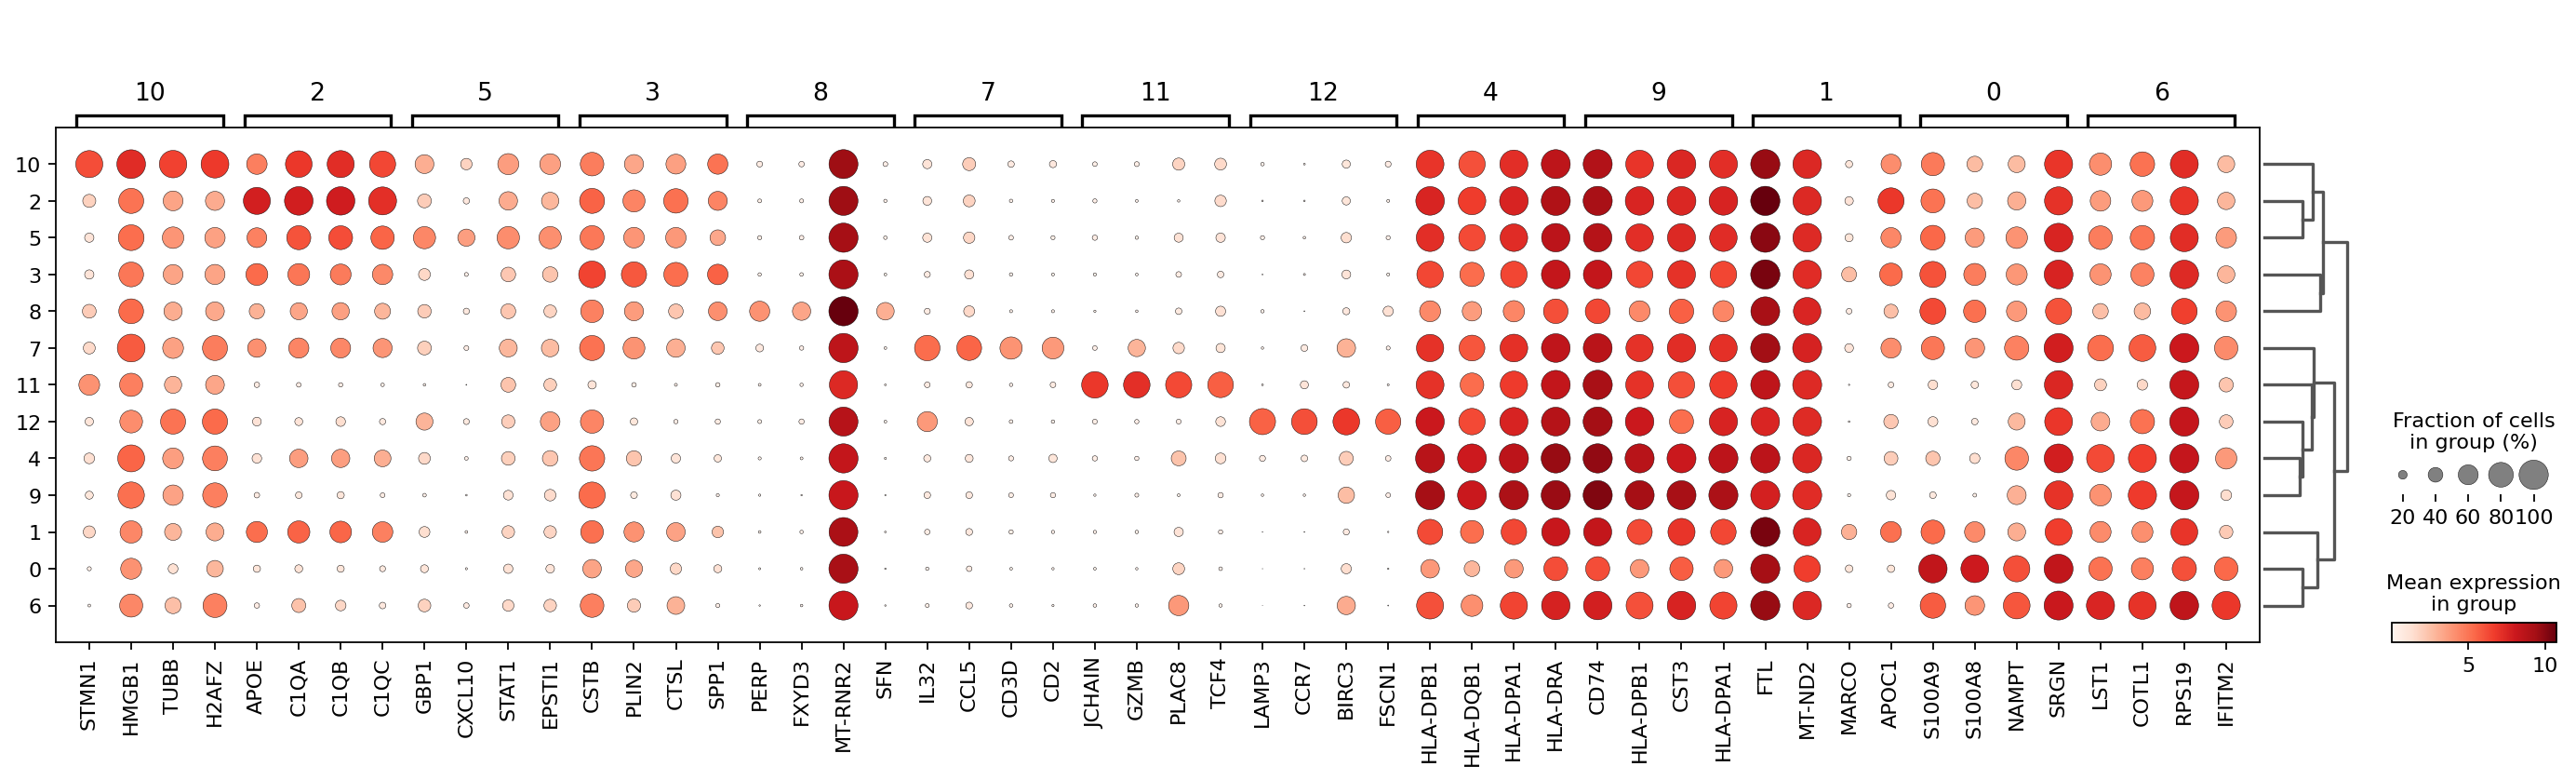

In [15]:
sc.tl.rank_genes_groups(em, 'leiden_0.6', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(em, n_genes=4)

categories: 0, 1, 2, etc.
var_group_labels: Granulocytes, Neutrophils, DC, etc.


/data/hour/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


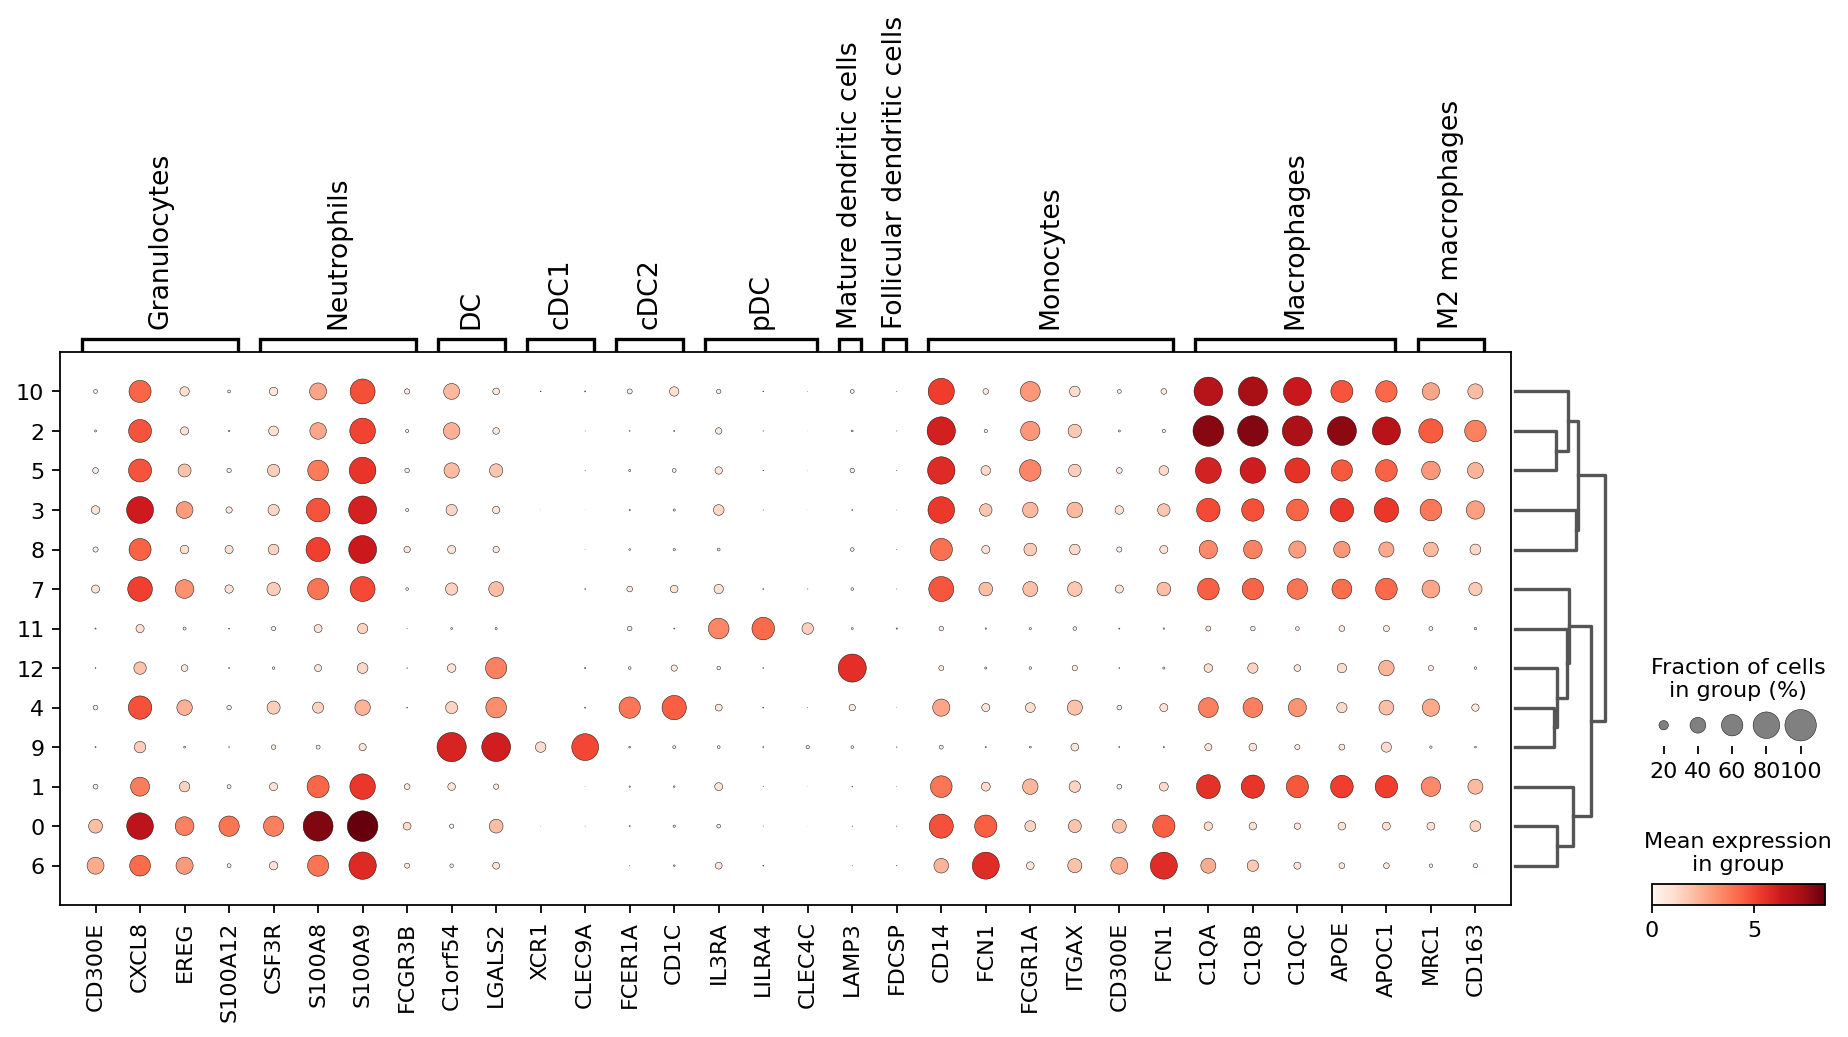

In [32]:
markerDict = {
'Granulocytes':["CD300E","CXCL8","EREG","S100A12"],
'Neutrophils':['CSF3R','S100A8','S100A9','FCGR3B'],##

'DC':["C1orf54","LGALS2"],
'cDC1':['XCR1','CLEC9A'],##
'cDC2':['FCER1A','CD1C'],##
'pDC':['IL3RA','LILRA4','CLEC4C'],##
'Mature dendritic cells':['LAMP3'],##
'Follicular dendritic cells':['FDCSP'],##

'Monocytes':['CD14','FCN1',"FCGR1A","ITGAX",'CD300E','FCN1'], 
'Macrophages':['C1QA','C1QB','C1QC','APOE','APOC1'],##
'M2 macrophages':['MRC1','CD163'],##
}
sc.pl.dotplot(em, markerDict, groupby='leiden_0.6', dendrogram=True)

/data/hour/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


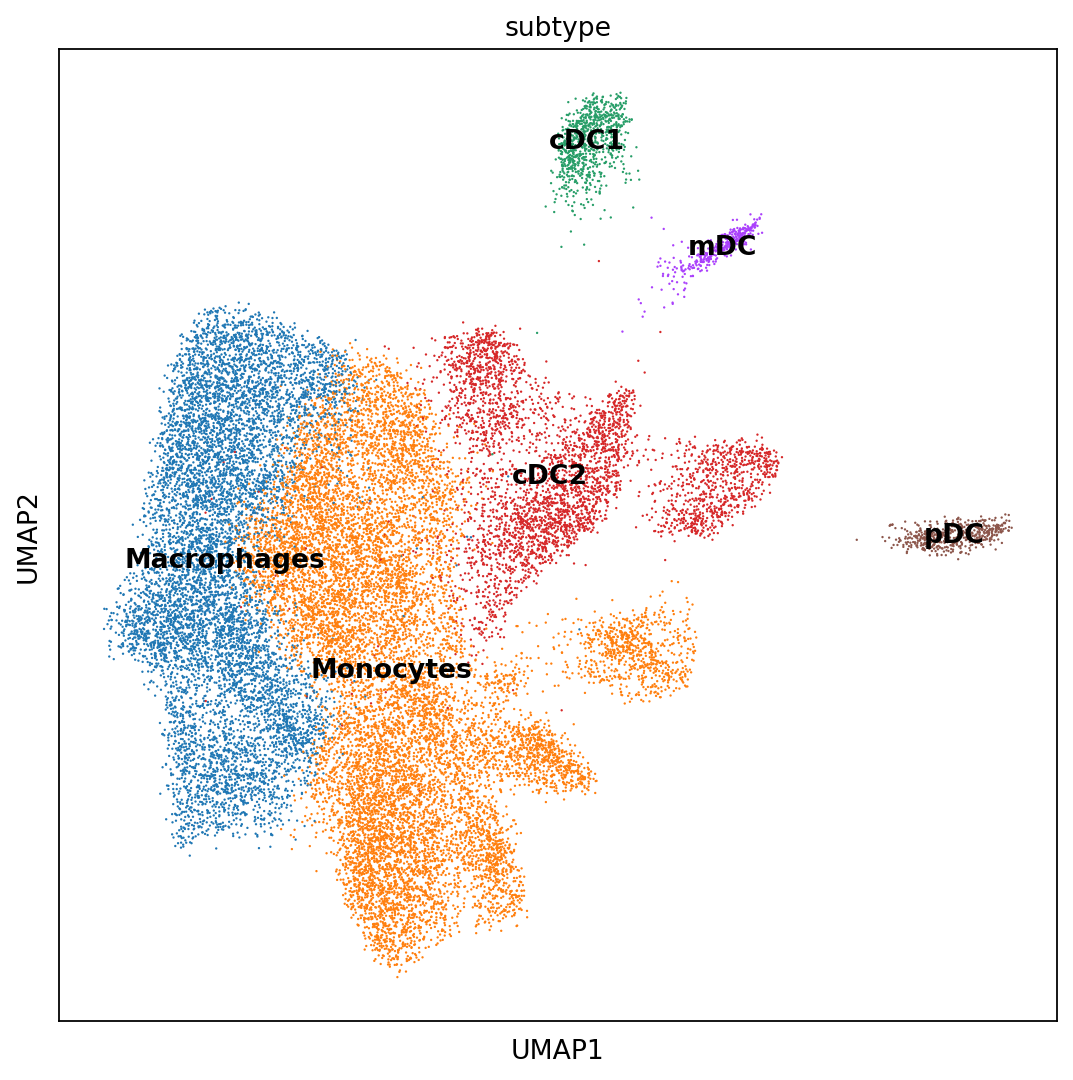

In [40]:
annDict = {
    '0':'Monocytes',
    '1':'Macrophages',
    '2':'Macrophages',#'Monocytes/Macrophages',#CXCL10+ TAM
    '3':'Monocytes',#'Monocytes/Macrophages',#CXCL10+ TAM
    '4':'cDC2',
    '5':'Monocytes',#'Monocytes/Macrophages',#CXCL10+ TAM
    '6':'Monocytes',
    '7':'cDC2',#'Monocytes/Macrophages',#CCL5+ TAM
    '8':'Monocytes',#'Monocytes/Macrophages',#SFN+ TAM
    '9':'cDC1',
    '10':'cDC2',#'Monocytes/Macrophages',#STMN1+ TAM
    '11':'pDC',
    '12':'mDC',
}
em.obs['subtype'] = [annDict[i] for i in em.obs['leiden_0.6']]
sc.pl.umap(em,color=['subtype'],legend_loc='on data',palette=sc.pl.palettes.vega_20_scanpy, save='-Myeloid cells')

In [39]:
em.write('K135_lusc_Mye.h5ad')

In [41]:
em.obs.to_csv('K135_lusc_Mye_obs.csv', index=True, header=True)

# proportion analysis

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
all_obs = pd.read_csv(r'F:\沈阳242\code\K135_lusc_all_obs.csv', index_col=0)
all_obs

Tissue Disease    Stage CellName  \
2018jz11_AAACCTGAGGGATCTG-1    Tumor    LUSC        I      CD4   
2018jz11_AAACCTGCACATTCGA-1    Tumor    LUSC        I      CD8   
2018jz11_AAACCTGGTCAGGACA-1    Tumor    LUSC        I       NE   
2018jz11_AAACCTGTCAAAGACA-1    Tumor    LUSC        I        B   
2018jz11_AAACGGGCATACTCTT-1    Tumor    LUSC        I        B   
...                              ...     ...      ...      ...   
P41_TATAAGTGTCTT-59          unknown    LUSC  unknown  unknown   
P41_ATGATCACGAGT-59          unknown    LUSC  unknown  unknown   
P41_CTGACGGTGAAA-59          unknown    LUSC  unknown  unknown   
P41_TTAACTATTCAC-59          unknown    LUSC  unknown  unknown   
P41_TTACGCTTACCT-59          unknown    LUSC  unknown  unknown   

                             n_genes_by_counts  total_counts  total_counts_mt  \
2018jz11_AAACCTGAGGGATCTG-1               1040        3446.0             68.0   
2018jz11_AAACCTGCACATTCGA-1                922        1937.0             52.0   
2018jz11_AAACCTGGTCAGGACA-1               1534        4462.0            613.0   
2018jz11_AAACCTGTCAAAGACA-1               1020        3251.0            138.0   
2018jz11_AAACGGGCATACTCTT-1                707        1739.0             34.0   
...                                        ...           ...              ...   
P41_TATAAGTGTCTT-59                        570         979.0            238.0   
P41_ATGATCACGAGT-59                        534         966.0            140.0   
P41_CTGACGGTGAAA-59                        503         959.0             46.0   
P41_TTAACTATTCAC-59                        500         914.0            234.0   
P41_TTACGCTTACCT-59                        605         974.0             79.0   

                             pct_counts_mt   source    sample patient  \
2018jz11_AAACCTGAGGGATCTG-1       1.973302   wchscu  2018jz11    PS02   
2018jz11_AAACCTGCACATTCGA-1       2.684564   wchscu  2018jz11    PS02   
2018jz11_AAACCTGGTCAGGACA-1      13.738234   wchscu  2018jz11    PS02   
2018jz11_AAACCTGTCAAAGACA-1       4.244848   wchscu  2018jz11    PS02   
2018jz11_AAACGGGCATACTCTT-1       1.955147   wchscu  2018jz11    PS02   
...                                    ...      ...       ...     ...   
P41_TATAAGTGTCTT-59              24.310520  shsfkyy       P41     P41   
P41_ATGATCACGAGT-59              14.492753  shsfkyy       P41     P41   
P41_CTGACGGTGAAA-59               4.796663  shsfkyy       P41     P41   
P41_TTAACTATTCAC-59              25.601751  shsfkyy       P41     P41   
P41_TTACGCTTACCT-59               8.110883  shsfkyy       P41     P41   

                             leiden_0.8  leiden_1         cell type  \
2018jz11_AAACCTGAGGGATCTG-1           3         4           T cells   
2018jz11_AAACCTGCACATTCGA-1           3         4           T cells   
2018jz11_AAACCTGGTCAGGACA-1           0         2   Malignant cells   
2018jz11_AAACCTGTCAAAGACA-1          12        13           B cells   
2018jz11_AAACGGGCATACTCTT-1          12        13           B cells   
...                                 ...       ...               ...   
P41_TATAAGTGTCTT-59                  14        15  Epithelial cells   
P41_ATGATCACGAGT-59                   9        10       Fibroblasts   
P41_CTGACGGTGAAA-59                   8         9     Myeloid cells   
P41_TTAACTATTCAC-59                   9        10       Fibroblasts   
P41_TTACGCTTACCT-59                   0         1  Epithelial cells   

                             cnv_leiden  cnv_score cnv_status stage_group  \
2018jz11_AAACCTGAGGGATCTG-1           2   0.005820     normal           I   
2018jz11_AAACCTGCACATTCGA-1           2   0.005820     normal           I   
2018jz11_AAACCTGGTCAGGACA-1          13   0.012374      tumor           I   
2018jz11_AAACCTGTCAAAGACA-1          18   0.003416     normal           I   
2018jz11_AAACGGGCATACTCTT-1          15   0.004665     normal           I   
...                                 ...        ...        ...         ..

In [38]:
ctList = list(set(em.obs['subtype']))
spList = sorted(list(set(em.obs['stage_sample'])))
spList

['III&IV_2018jz16',
 'III&IV_2018jz27',
 'III&IV_2018jz37',
 'III&IV_2018jz38',
 'III&IV_P1',
 'III&IV_P10',
 'III&IV_P14',
 'III&IV_P15',
 'III&IV_P17',
 'III&IV_P18',
 'III&IV_P19',
 'III&IV_P22',
 'III&IV_P23',
 'III&IV_P25',
 'III&IV_P26',
 'III&IV_P27',
 'III&IV_P3',
 'III&IV_P30',
 'III&IV_P31',
 'III&IV_P36',
 'III&IV_P37',
 'III&IV_P4',
 'III&IV_P40',
 'III&IV_P41',
 'III&IV_P6',
 'III&IV_P7',
 'II_2018jz4',
 'II_AK2831',
 'II_AK2833',
 'II_AK2834',
 'II_AK3272',
 'II_AK3273',
 'II_AK3274',
 'II_AK4295',
 'II_AK4296',
 'II_AK4297',
 'II_AK4298',
 'II_AK576',
 'II_BT1A',
 'II_BT1B',
 'II_BT1C',
 'I_2018jz11',
 'I_2018jz12',
 'I_2018jz46',
 'I_AK658',
 'I_AK659',
 'I_AK660',
 'I_AK661',
 'I_BT1375',
 'I_BT1376',
 'I_BT1377',
 'I_BT2A',
 'I_BT2B',
 'Norm_2018jz14',
 'Norm_2018jz15',
 'Norm_2018jz36',
 'Norm_2018jz39',
 'Norm_2018jz47',
 'Norm_2018jz5',
 'Norm_AK3714',
 'Norm_AK3715',
 'Norm_AK3716',
 'Norm_AK650',
 'Norm_AK651',
 'Norm_AK652',
 'Norm_AK653',
 'Norm_AK831',
 'Norm_

In [42]:
sizes = all_obs.groupby(['subtype', 'stage_sample']).size()
sizes

subtype    stage_sample   
AT1 cells  III&IV_2018jz16     2
           III&IV_2018jz27     3
           III&IV_2018jz37    33
           III&IV_2018jz38    23
           III&IV_P1          30
                              ..
pDC        Norm_AK831          3
           Norm_AK832          3
           Norm_AK833          3
           Norm_AK834          2
           Norm_BT1378         2
Length: 1543, dtype: int64

In [6]:
sizes = all_obs.groupby(['subtype', 'stage_sample']).size()
props = sizes.groupby(level=1).apply(lambda x: 100 * x / x.sum()).reset_index() 
props = props.pivot(columns='stage_sample', index='subtype').T
props.index = props.index.droplevel(0)
print(props.index)
props.fillna(0, inplace=True)
props = props.loc[spList,reversed(ctList)]
props

Index(['III&IV_2018jz16', 'III&IV_2018jz27', 'III&IV_2018jz37',
       'III&IV_2018jz38', 'III&IV_P1', 'III&IV_P10', 'III&IV_P14',
       'III&IV_P15', 'III&IV_P17', 'III&IV_P18', 'III&IV_P19', 'III&IV_P22',
       'III&IV_P23', 'III&IV_P25', 'III&IV_P26', 'III&IV_P27', 'III&IV_P3',
       'III&IV_P30', 'III&IV_P31', 'III&IV_P36', 'III&IV_P37', 'III&IV_P4',
       'III&IV_P40', 'III&IV_P41', 'III&IV_P6', 'III&IV_P7', 'II_2018jz4',
       'II_AK2831', 'II_AK2833', 'II_AK2834', 'II_AK3272', 'II_AK3273',
       'II_AK3274', 'II_AK4295', 'II_AK4296', 'II_AK4297', 'II_AK4298',
       'II_AK576', 'II_BT1A', 'II_BT1B', 'II_BT1C', 'I_2018jz11', 'I_2018jz12',
       'I_2018jz46', 'I_AK658', 'I_AK659', 'I_AK660', 'I_AK661', 'I_BT1375',
       'I_BT1376', 'I_BT1377', 'I_BT2A', 'I_BT2B', 'Norm_2018jz14',
       'Norm_2018jz15', 'Norm_2018jz36', 'Norm_2018jz39', 'Norm_2018jz47',
       'Norm_2018jz5', 'Norm_AK3714', 'Norm_AK3715', 'Norm_AK3716',
       'Norm_AK650', 'Norm_AK651', 'Norm_AK652', 'Nor

/tmp/ipykernel_155175/1568215440.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  props = sizes.groupby(level=1).apply(lambda x: 100 * x / x.sum()).reset_index()


subtype               mDC      cDC2      cDC1  Macrophages       pDC  \
stage_sample                                                           
III&IV_2018jz16  0.073892  2.660099  0.295567     2.980296  0.344828   
III&IV_2018jz27  0.241984  4.960678  0.362976     2.117362  0.483969   
III&IV_2018jz37  0.375134  2.224009  0.294748     5.546624  0.375134   
III&IV_2018jz38  0.491400  5.692056  0.122850     9.254709  0.245700   
III&IV_P1        0.075230  1.542223  0.056423     5.153282  0.037615   
...                   ...       ...       ...          ...       ...   
Norm_AK832       0.202429  1.619433  2.515905     1.561596  0.086755   
Norm_AK833       0.208086  1.724138  2.586207     1.605232  0.089180   
Norm_AK834       0.203725  1.600698  2.532014     1.571595  0.058207   
Norm_BT1247      0.000000  2.150538  0.358423    20.071685  0.000000   
Norm_BT1378      0.156189  3.670441  0.117142    19.679813  0.078094   

subtype          Monocytes  
stage_sample                
III&IV_2018jz16   6.699507  
III&IV_2018jz27   6.836056  
III&IV_2018jz37  11.173633  
III&IV_2018jz38  23.300573  
III&IV_P1         8.595072  
...                    ...  
Norm_AK832        2.024291  
Norm_AK833        1.991677  
Norm_AK834        2.066356  
Norm_BT1247       8.243728  
Norm_BT1378      16.751269  

[72 rows x 6 columns]

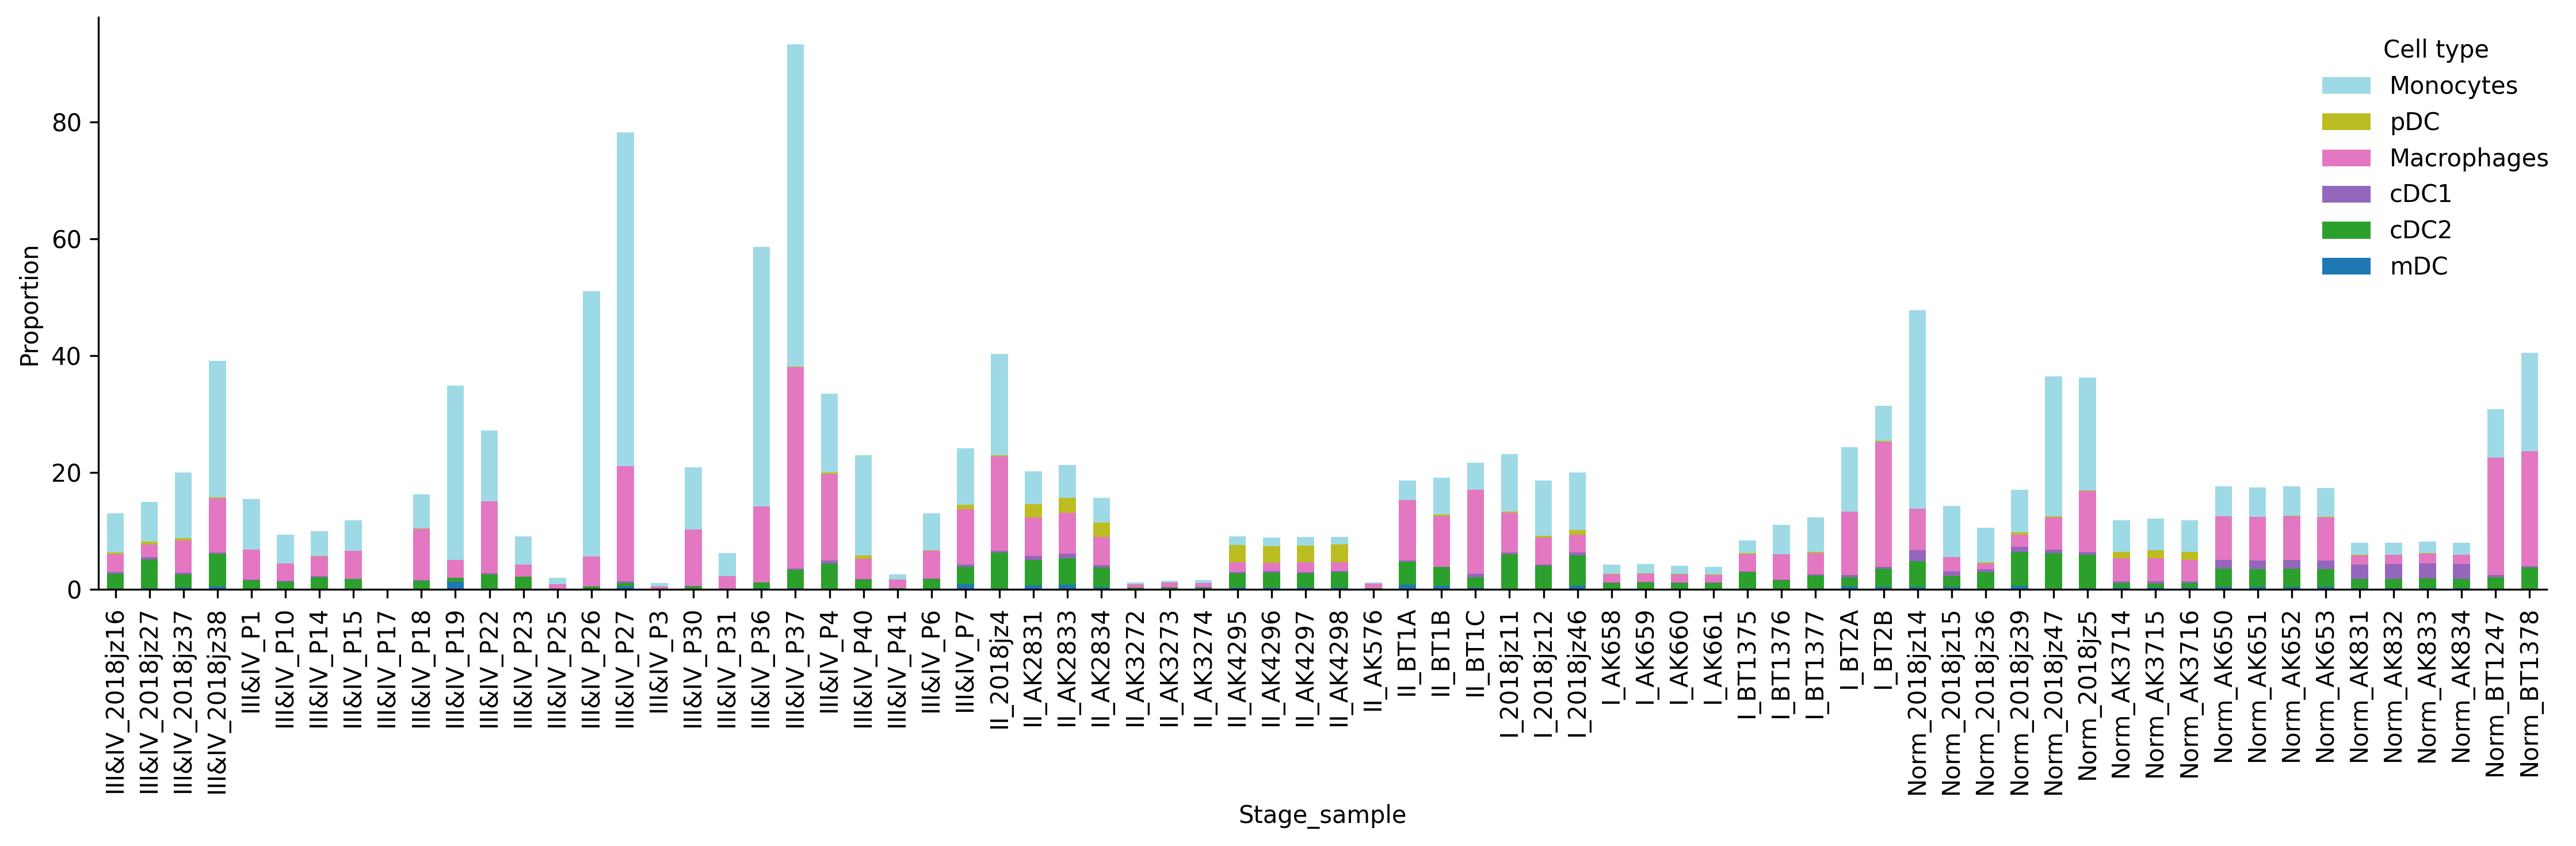

In [7]:
fig, ax = plt.subplots(dpi=300, figsize=(15, 5))
props.plot(kind="bar", stacked=True, ax=ax, legend=None, colormap='tab20')
# Matplotlib idiom to reverse legend entries 
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.01, 1), frameon=False, title="Cell type")
sns.despine(fig, ax)
ax.tick_params(axis="x", rotation=90)
ax.set_xlabel(props.index.name.capitalize())
ax.set_ylabel("Proportion")
fig.patch.set_facecolor("white")
plt.grid(False)
#sc.settings.set_figure_params(fontsize=10, figsize=(5, 25))
fig.tight_layout()
fig.savefig('figures/fraction-Myeloid cells.pdf')

In [51]:
from scipy.stats import f_oneway

In [50]:
I_list = set([em.obs.loc[i,'stage_sample'] for i in em.obs.index if em.obs.loc[i,'stage_group']=='I'])
II_list = set([em.obs.loc[i,'stage_sample'] for i in em.obs.index if em.obs.loc[i,'stage_group']=='II'])
IIIIV_list = set([em.obs.loc[i,'stage_sample'] for i in em.obs.index if em.obs.loc[i,'stage_group']=='III&IV'])
Norm_list = set([em.obs.loc[i,'stage_sample'] for i in em.obs.index if em.obs.loc[i,'stage_group']=='Norm'])

In [52]:
for ct in ctList:
    print(ct,'-> pvalue:')
    print(f_oneway(props.loc[I_list,ct],
             props.loc[II_list,ct],
             props.loc[IIIIV_list,ct],
             props.loc[Norm_list,ct]).pvalue)

Monocytes -> pvalue:
0.014330074457473486
mDC -> pvalue:
0.2699680799907705
cDC1 -> pvalue:
1.04080202620811e-09
Macrophages -> pvalue:
0.7782248356418214
pDC -> pvalue:
1.1448041399510662e-05
cDC2 -> pvalue:
0.14710473665476417


/tmp/ipykernel_254665/608974009.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(f_oneway(props.loc[I_list,ct],
/tmp/ipykernel_254665/608974009.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  props.loc[II_list,ct],
/tmp/ipykernel_254665/608974009.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  props.loc[IIIIV_list,ct],
/tmp/ipykernel_254665/608974009.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  props.loc[Norm_list,ct]).pvalue)
/tmp/ipykernel_254665/608974009.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(f_oneway(props.loc[I_list,ct],
/tmp/ipykernel_254665/608974009.py:4: FutureWarning: Passing a set as an indexe

In [48]:
props['stage'] = [i.split('_')[0] for i in props.index]
props

subtype              cDC2       pDC  Macrophages      cDC1       mDC  \
stage_sample                                                           
III&IV_2018jz16  2.660099  0.344828     2.980296  0.295567  0.073892   
III&IV_2018jz27  4.960678  0.483969     2.117362  0.362976  0.241984   
III&IV_2018jz37  2.224009  0.375134     5.546624  0.294748  0.375134   
III&IV_2018jz38  5.692056  0.245700     9.254709  0.122850  0.491400   
III&IV_P1        1.542223  0.037615     5.153282  0.056423  0.075230   
...                   ...       ...          ...       ...       ...   
Norm_AK832       1.619433  0.086755     1.561596  2.515905  0.202429   
Norm_AK833       1.724138  0.089180     1.605232  2.586207  0.208086   
Norm_AK834       1.600698  0.058207     1.571595  2.532014  0.203725   
Norm_BT1247      2.150538  0.000000    20.071685  0.358423  0.000000   
Norm_BT1378      3.670441  0.078094    19.679813  0.117142  0.156189   

subtype          Monocytes   stage  
stage_sample                        
III&IV_2018jz16   6.699507  III&IV  
III&IV_2018jz27   6.836056  III&IV  
III&IV_2018jz37  11.173633  III&IV  
III&IV_2018jz38  23.300573  III&IV  
III&IV_P1         8.595072  III&IV  
...                    ...     ...  
Norm_AK832        2.024291    Norm  
Norm_AK833        1.991677    Norm  
Norm_AK834        2.066356    Norm  
Norm_BT1247       8.243728    Norm  
Norm_BT1378      16.751269    Norm  

[72 rows x 7 columns]

In [49]:
props.to_csv('proportion/K135_proportion_Mye.csv', index=True, header=True)#violin plot by R

In [5]:
sc.tl.rank_genes_groups(em, "subtype",method="t-test")

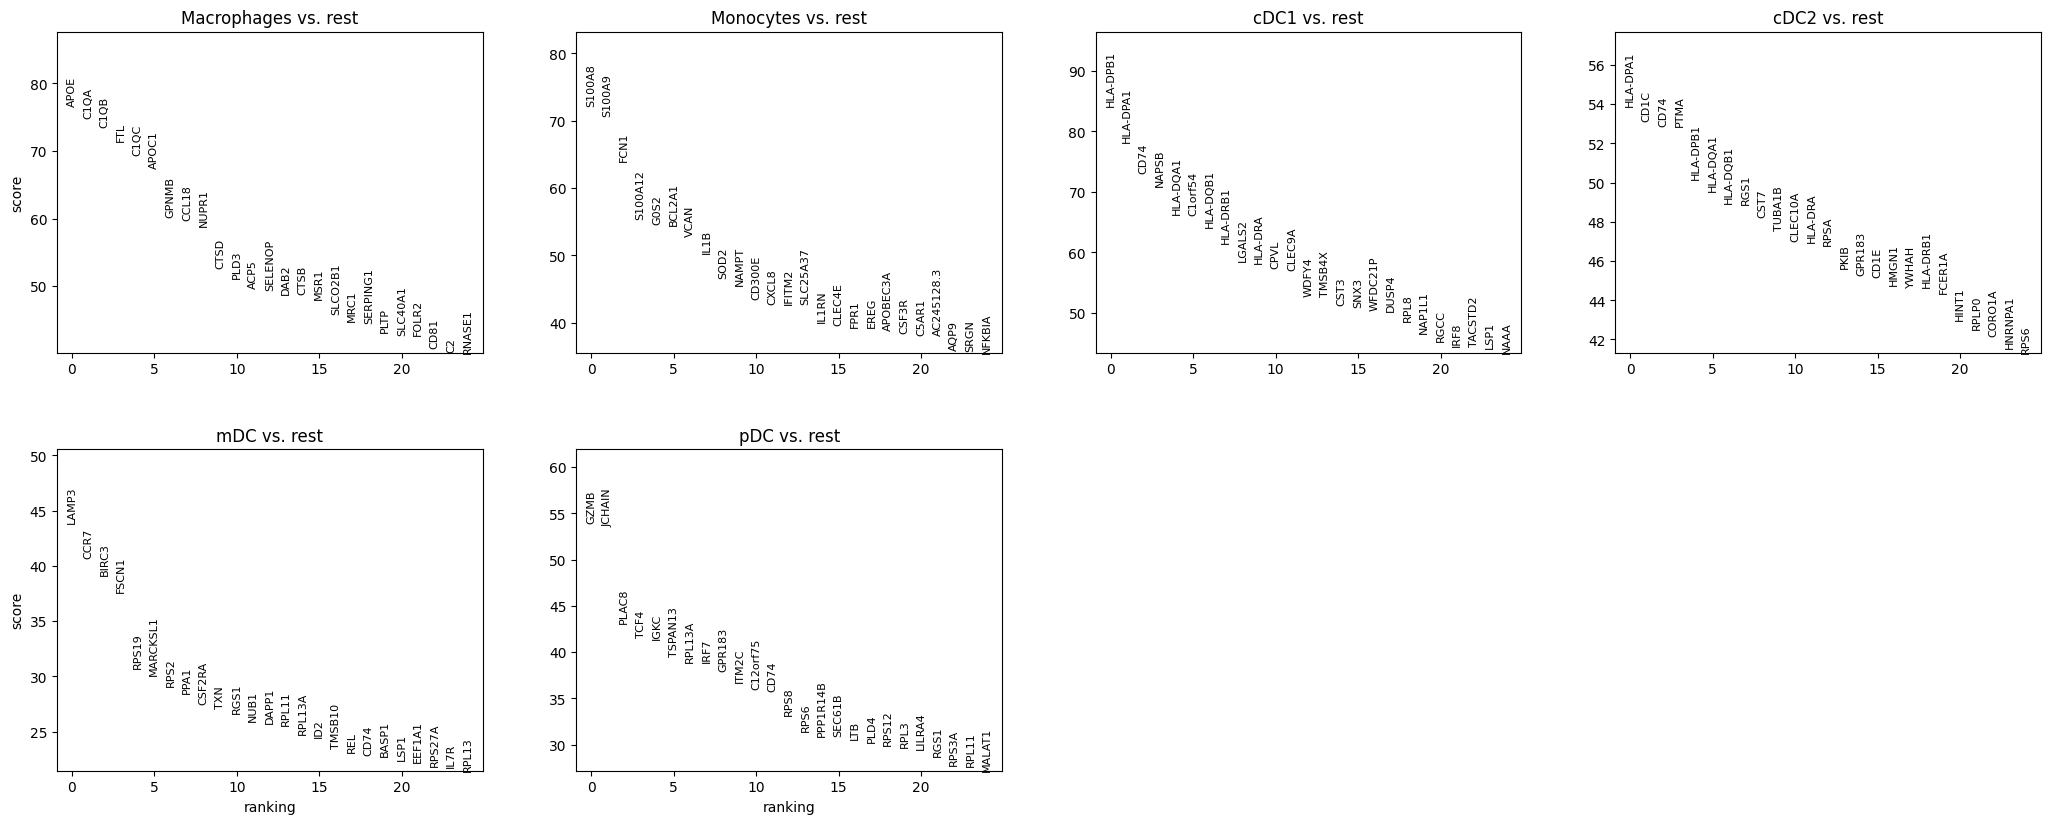

In [6]:
sc.pl.rank_genes_groups(em,n_genes=25,sharey=False)

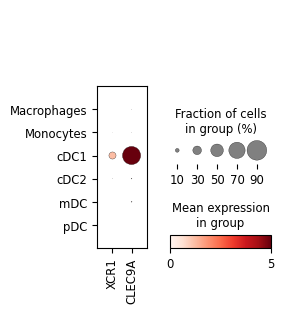

In [44]:
import os
#单个细胞类型绘制
index = 1
df = pd.DataFrame(em.uns["rank_genes_groups"]["names"]).head(100)
#df.to_csv(os.path.join('marker','myeloid.csv'), index=True, header=True)

#替换线粒体基因
df2 = pd.DataFrame(em.uns["rank_genes_groups"]["names"]).head(100)
new_markers_tmp = df2.iloc[:,index]
new_markers = [i for i in new_markers_tmp if not i.startswith("MT-")]
marker_genes = new_markers[0:50]
marker_genes = ['XCR1','CLEC9A']
sc.pl.dotplot(em, marker_genes, groupby="subtype")

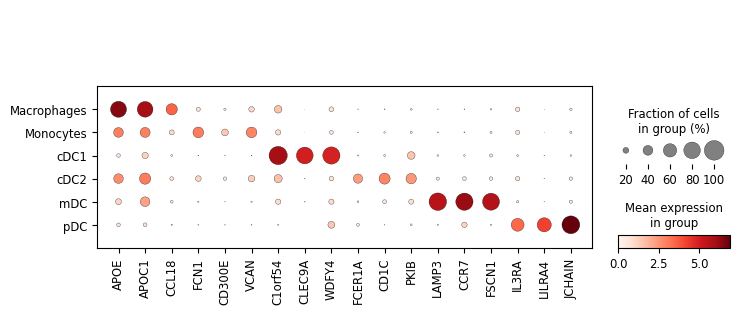

In [43]:
import os
df = pd.DataFrame(em.uns["rank_genes_groups"]["names"]).head(100)
marker_genes = ['APOE','APOC1','CCL18','FCN1','CD300E','VCAN','C1orf54','CLEC9A','WDFY4','FCER1A','CD1C','PKIB','LAMP3','CCR7','FSCN1','IL3RA','LILRA4','JCHAIN']
sc.pl.dotplot(em, marker_genes, groupby="subtype",save='dotplot_myeloid_markers.pdf')

In [ ]:
markerDict = {
'Granulocytes':["CD300E","CXCL8","EREG","S100A12"],
'Neutrophils':['CSF3R','S100A8','S100A9','FCGR3B'],##

'DC':["C1orf54","LGALS2"],
'cDC1':['XCR1','CLEC9A'],##
'cDC2':['FCER1A','CD1C'],##
'pDC':['IL3RA','LILRA4','CLEC4C'],##
'Mature dendritic cells':['LAMP3'],##
'Follicular dendritic cells':['FDCSP'],##

'Monocytes':['CD14','FCN1',"FCGR1A","ITGAX",'CD300E','FCN1'], 
'Macrophages':['C1QA','C1QB','C1QC','APOE','APOC1'],##
'M2 macrophages':['MRC1','CD163'],##
}